<a href="https://colab.research.google.com/github/greagrea/web1/blob/main/Urban_sound_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'baaeeek' # username
os.environ['KAGGLE_KEY'] = 'f52c9785fa2f0ccfaa4e4b31b98bca40' # key

In [3]:
!kaggle datasets download -d chrisfilo/urbansound8k

100% 5.61G/5.61G [02:00<00:00, 136MB/s]
100% 5.61G/5.61G [02:01<00:00, 49.8MB/s]


In [4]:
!unzip -q urbansound8k.zip

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [6]:
data=pd.read_csv("UrbanSound8K.csv")

In [7]:
data.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [8]:
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [9]:
from librosa import display
import librosa

In [10]:
y,sr=librosa.load("fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
print(y.shape)
print(y)

(7002,)
[-0.00346022 -0.00502555 -0.00465325 ... -0.00248061 -0.00155105
 -0.0003528 ]


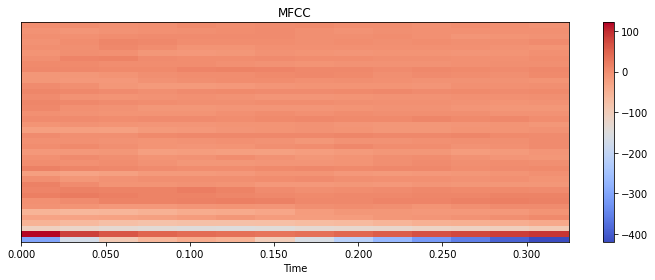

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [12]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    if(fold_no!='10'):
      x_train.append(mfccs)
      y_train.append(label)
    else:
      x_test.append(mfccs)
      y_test.append(label)

 41%|████      | 3555/8732 [12:12<17:06,  5.04it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
 95%|█████████▌| 8325/8732 [27:53<00:56,  7.26it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
100%|██████████| 8732/8732 [29:08<00:00,  4.99it/s]


In [13]:
len(x_train)+len(x_test)

8732

In [14]:
len(data)

8732

In [15]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 40), (837, 40), (7895,), (837,))

In [16]:
np.savetxt("train_data.csv", x_train, delimiter=",")
np.savetxt("test_data.csv",x_test,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")

In [18]:
x_test[0].shape

(40,)

In [19]:
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 40), (837, 40), (7895,), (837,))

In [21]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((7895, 10), (837, 10))

In [22]:
x_train=np.reshape(x_train,(x_train.shape[0], 40,1,1))
x_test=np.reshape(x_test,(x_test.shape[0], 40,1,1))

In [23]:
x_train.shape,x_test.shape

((7895, 40, 1, 1), (837, 40, 1, 1))

In [24]:
from tensorflow.keras import Sequential
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import Model

2.5.0


In [25]:
model=Sequential()

In [26]:
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,1,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

In [27]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [28]:
model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
158/158 [==============================] - 33s 7ms/step - loss: 1.6771 - accuracy: 0.4123 - val_loss: 1.4687 - val_accuracy: 0.4898
Epoch 2/30
158/158 [==============================] - 1s 4ms/step - loss: 1.1412 - accuracy: 0.6089 - val_loss: 1.3305 - val_accuracy: 0.5281
Epoch 3/30
158/158 [==============================] - 1s 4ms/step - loss: 0.8693 - accuracy: 0.7031 - val_loss: 1.2586 - val_accuracy: 0.5603
Epoch 4/30
158/158 [==============================] - 1s 4ms/step - loss: 0.7087 - accuracy: 0.7657 - val_loss: 1.2259 - val_accuracy: 0.5998
Epoch 5/30
158/158 [==============================] - 1s 4ms/step - loss: 0.6045 - accuracy: 0.7953 - val_loss: 1.2599 - val_accuracy: 0.6117
Epoch 6/30
158/158 [==============================] - 1s 4ms/step - loss: 0.5246 - accuracy: 0.8196 - val_loss: 1.3355 - val_accuracy: 0.5914
Epoch 7/30
158/158 [==============================] - 1s 4ms/step - loss: 0.4675 - accuracy: 0.8429 - val_loss: 1.3615 - val_accuracy: 0.6081
Epoch

In [29]:
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

27/27 [==============================] - 0s 4ms/step - loss: 2.1123 - accuracy: 0.6296
[0.024139443412423134, 0.994173526763916]
[2.1122794151306152, 0.6296296119689941]


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 40, 1, 64)         1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 1, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 1, 128)        204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 1, 128)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 1, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               3

In [31]:
model.save('urbanClassifier')

INFO:tensorflow:Assets written to: urbanClassifier/assets


In [32]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpvonj3_ch/assets


In [33]:
x_test[0].shape

(40, 1, 1)

In [34]:
testData = np.expand_dims(x_test[5],axis=0)
prediction = model.predict_classes(testData)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
prediction

array([3])

In [36]:
y_test[5]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [37]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [38]:
input_details

[{'dtype': numpy.float32,
  'index': 0,
  'name': 'conv2d_input',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([ 1, 40,  1,  1], dtype=int32),
  'shape_signature': array([-1, 40,  1,  1], dtype=int32),
  'sparsity_parameters': {}}]

In [39]:
testData = np.expand_dims(x_test[5],axis=0)
atData = np.float32(testData)

In [40]:
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], atData)
print(input_data.dtype)
print(testData.shape)
interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

float32
(1, 40, 1, 1)
[[3.7125814e-15 1.7018874e-12 4.2197898e-05 9.9995613e-01 4.4428518e-08
  8.1795253e-13 2.1265755e-07 1.4132175e-15 1.4106186e-06 5.4203171e-09]]
